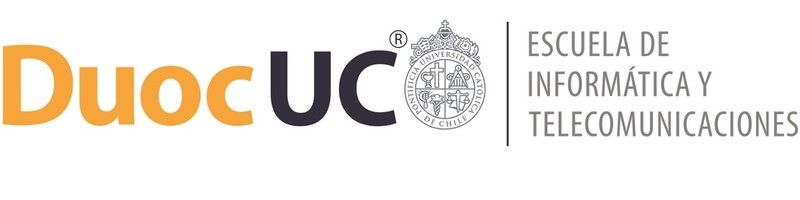

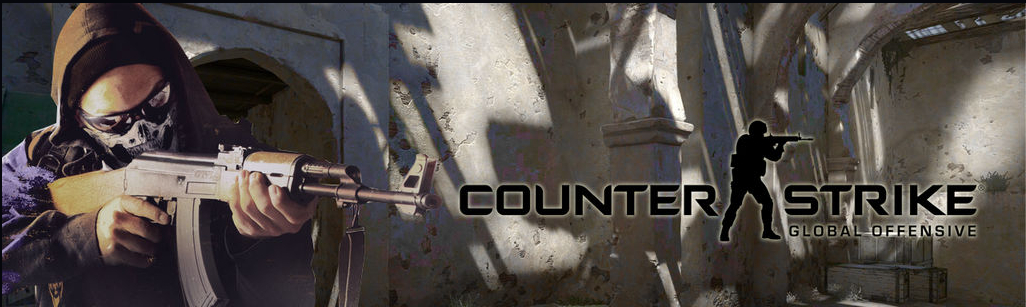

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
Felipe Olavarria,
Benjamin Oviedo,
Benjamin Sandoval


Docente: Giocrisrai Godoy      

Sección: MLY0100 - 002D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

Para comenzar, importamos librerías esenciales (numpy, pandas, matplotlib, seaborn) y cargamos el archivo CSV proporcionado por Valve que contiene registros de partidas de Counter Strike: Global Offensive.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.linear_model import LinearRegression

# Upload the CSV file
uploaded = files.upload()

# Read the CSV file
for file_name in uploaded.keys():
    df = pd.read_csv(file_name, sep=';')


Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


<ipython-input-2-9a9aad223f75>:13: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, sep=';')


Visualizamos las primeras filas para entender la estructura del dataset y realizamos la identificación de tipos de variables (cuantitativas y cualitativas).

In [ ]:
#Primeras 5 filas
df.head(5)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


In [ ]:
#Verificar columnas y tipo de dato
columnas = df.columns
for columna in columnas:
  if df[columna].dtype == int:
    print(f"Columna {columna} ------ Tipo de variable: Cuantitativa discreta")
  elif df[columna].dtype == float:
    print(f"Columna {columna} ------ Tipo de variable: Cuantitativa continua")
  elif df[columna].dtype == object:
    print(f"Columna {columna} ------ Tipo de variable: Cualitativa nominal")
  elif df[columna].dtype == bool:
    print(f"Columna {columna} ------ Tipo de variable: Cualitativa ordinal")

Columna Unnamed: 0 ------ Tipo de variable: Cuantitativa discreta
Columna Map ------ Tipo de variable: Cualitativa nominal
Columna Team ------ Tipo de variable: Cualitativa nominal
Columna InternalTeamId ------ Tipo de variable: Cuantitativa discreta
Columna MatchId ------ Tipo de variable: Cuantitativa discreta
Columna RoundId ------ Tipo de variable: Cuantitativa discreta
Columna RoundWinner ------ Tipo de variable: Cualitativa nominal
Columna MatchWinner ------ Tipo de variable: Cualitativa nominal
Columna Survived ------ Tipo de variable: Cualitativa ordinal
Columna AbnormalMatch ------ Tipo de variable: Cualitativa ordinal
Columna TimeAlive ------ Tipo de variable: Cualitativa nominal
Columna TravelledDistance ------ Tipo de variable: Cualitativa nominal
Columna RLethalGrenadesThrown ------ Tipo de variable: Cuantitativa discreta
Columna RNonLethalGrenadesThrown ------ Tipo de variable: Cuantitativa discreta
Columna PrimaryAssaultRifle ------ Tipo de variable: Cuantitativa continu

### **Hipótesis.**

De acuerdo con los datos que se pueden apreciar, se podría trabajar bajo las siguientes hipótesis:



* ¿Afecta al equipo el uso de granadas letales y no letales para ganar la ronda?

* De acuerdo con lo gastado en su equipamiento ¿Tiene más posibilidades de sobrevivir?

* ¿ Afecta el uso de granadas no letales y del valor de su equipo en la cantidad de muertes que el jugador realiza?

* ¿Que tipo de arma es más popular, hay una relación entre popularidad y posibilidades de ganar?


* ¿Existe una relacion entre los headshot y los mapas?


## Fase 2: Data Understanding

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.


###Verificación de datos nulos y posibles errores en DataFrame

In [ ]:
df.isnull().sum()


,0
Unnamed: 0,0
Map,0
Team,0
InternalTeamId,0
MatchId,0
RoundId,0
RoundWinner,0
MatchWinner,0
Survived,0
AbnormalMatch,0


In [ ]:
#Selección de datos nulos en columna MatchWinner
df[df['MatchWinner'].isnull()]

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,UsaAssaultRifle,UsaSniperRifle,UsaHeavy,UsaSMG,UsaPistol
29,629,de_inferno,CounterTerrorist,2,4,3,False4,NaN,True,False,...,22850,2,0,1,2,1,0,0,0,0


In [ ]:
#De acuerdo al negocio, las partidas, como mínimo, duran 16 rondas. Se verifica
#esto con este código
for partida in df['MatchId'].unique():
  if df[df['MatchId']==partida]['RoundId'].unique().size<16:
    print(f"Partida de Id {partida}: Cantidad de Rondas: {df[df['MatchId']==partida]['RoundId'].unique()}")

Partida de Id 11: Cantidad de Rondas: [1 2 3 4 5 6 7]
Partida de Id 181: Cantidad de Rondas: [1 2 3 4 5 6]
Partida de Id 444: Cantidad de Rondas: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Partida de Id 507: Cantidad de Rondas: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Partida de Id 511: Cantidad de Rondas: [1 2 3 4 5]


In [ ]:
#Verificación de la cantidad de jugadores por equipo (ver si hay que
#eliminar partidas por un número incorrecto de equipo)
for partida in df['MatchId'].unique():
  cant_t1 = df[(df['InternalTeamId']==1) & (df['MatchId']==partida)]['Map'].count()
  cant_t2 = df[(df['InternalTeamId']==2) & (df['MatchId']==partida)]['Map'].count()
  if(cant_t1-cant_t2!=0):
    print(f"Partida {partida}: {cant_t1-cant_t2}")

### Medidas de posicion

In [ ]:
#Resumen de Medidas de posición, para datos numéricos
df.describe(include="number")

,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,UsaAssaultRifle,UsaSniperRifle,UsaHeavy,UsaSMG,UsaPistol
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,18890.133532,8.511578,1.209912,1.874831,3.858484,0.699420,0.120899,0.007087,0.008287,0.221787
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,9743.203024,6.195079,1.435150,1.824027,3.246752,0.458513,0.326012,0.083887,0.090657,0.415451
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10900.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,22550.000000,8.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,26050.000000,13.000000,2.000000,3.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,36150.000000,41.000000,11.000000,14.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Resumen de Medidas de posición, para datos categóricos
df.describe(include='object')

,Map,Team,RoundWinner,MatchWinner,TimeAlive,TravelledDistance,FirstKillTime
count,79157,79155,79157,79156,79157,79157,79157
unique,4,2,5,2,51627,78001,33855
top,de_inferno,Terrorist,False,False,0.0,0.0,0.0
freq,28869,39591,23195,42017,68,272,5305


In [ ]:
# Medidas de dispersión de todos los datos
for dato in df.columns:
  if df[dato].dtype in [int,float]:
    print(f"La media de la columna {dato} es: {df[dato].mean()} - La moda es: {df[dato].mode()[0]} - La mediana es: {df[dato].median()} - La desviación estándar es: {df[dato].std()}\n")
  elif df[dato].dtype in [object, bool]:
    print(f"En la columna {dato}, existen {df[dato].unique().size} dato/s. Los datos son: {df[dato].unique()}. El que más se repite es {df[dato].value_counts().index[0]} con {df[dato].value_counts().iloc[0]} repeticiones.\n")

La media de la columna Unnamed: 0 es: 60587.221562743725 - La moda es: 600 - La mediana es: 56738.0 - La desviación estándar es: 36430.14003339227

En la columna Map, existen 4 dato/s. Los datos son: ['de_inferno' 'de_nuke' 'de_mirage' 'de_dust2']. El que más se repite es de_inferno con 27599 repeticiones.

En la columna Team, existen 2 dato/s. Los datos son: ['Terrorist' 'CounterTerrorist']. El que más se repite es Terrorist con 38238 repeticiones.

La media de la columna InternalTeamId es: 1.4979180161006755 - La moda es: 1 - La mediana es: 1.0 - La desviación estándar es: 0.49999897006491467

La media de la columna MatchId es: 250.59536808153445 - La moda es: 29 - La mediana es: 236.0 - La desviación estándar es: 149.53063728760614

La media de la columna RoundId es: 12.754682811405306 - La moda es: 2 - La mediana es: 12.0 - La desviación estándar es: 7.434264414087662

En la columna RoundWinner, existen 4 dato/s. Los datos son: ['False' 'True' True False]. El que más se repite es T

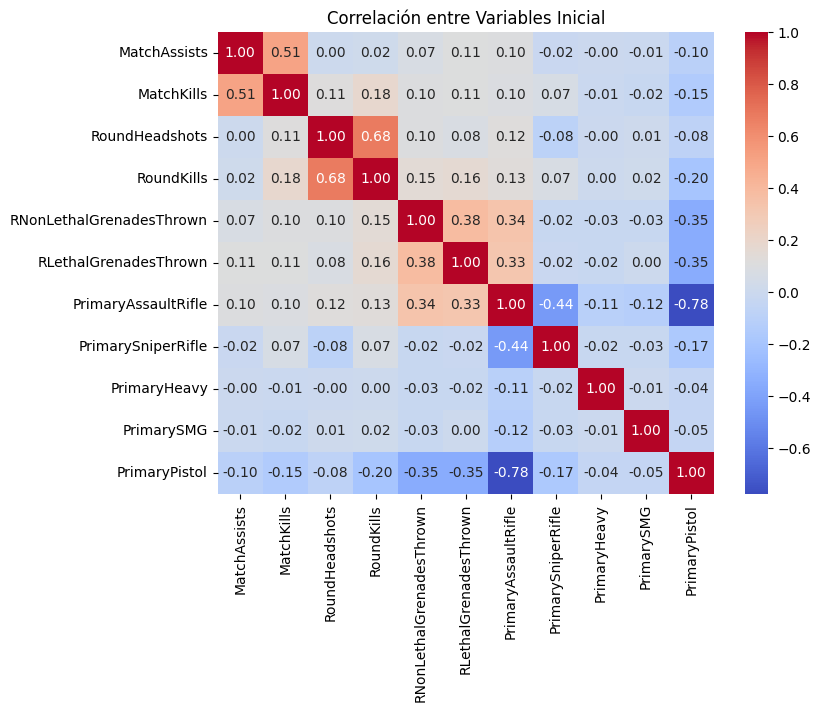

In [ ]:
correlacion_inicial = df[[
    'MatchAssists', 'MatchKills','RoundHeadshots', 'RoundKills',
    'RNonLethalGrenadesThrown','RLethalGrenadesThrown',
    'PrimaryAssaultRifle', 'PrimarySniperRifle','PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol',]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_inicial, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre Variables Inicial')
plt.show()

Se puede apreciar ciertas relaciones entre las variables, entre las cuales se destaca:

Directas:
* Con un 51%, está mientras mayor cantidad de match kills, mayor cantidad de match assists habrá y viceversa.
* Con un 68%, a mayor cantidad de muertes por ronda, mayor cantidad de tiros a la cabeza habrá, y viceversa.
* Luego, con un 33%, está la relación entre tirar granadas letales y poseer un rifle de asalto; con un 34% el tener un rifle de asalto y lanzar una granada no letal; con un 38% el haber lanzado ambas granadas.

Indirectas:
* Con un 35% en ambas ocasiones, mientras más jugadores con pistola haya, existe menos posibilidad de haber lanzado una granada, tanto letal como no letal, y viceversa.
* Con un 44% está el haber comprado un Rifle a larga distancia y un rifle de asalto, y viceversa.
* Con un 78% está el comprar rifle de asalto y una pistola en la misma ronda, y viceversa.

1. ¿Cuál será la pregunta que queremos responder?
2. Generar una visión general de nuestros datos
3. Revisar los tipos de datos que tenemos
4. Elegir el tipo de estadística descriptiva
5. Visualizar los datos
6. Analizar las posibles interacciones entre las variables
7. Extraer algunas conclusiones de todo este análisis

# Pregunta de regresion


## ¿Que tipo de arma es más popular, hay una relación entre popularidad y posibilidades de ganar?

In [ ]:
# Ver las columnas que hablan de armas principales
df.columns


Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'UsaAssaultRifle', 'UsaSniperRifle', 'UsaHeavy', 'UsaSMG', 'UsaPistol'],
      dtype='object')

In [ ]:
# Sumar el uso de cada tipo de arma
uso_armas = df[['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']].sum()

# Mostrar el uso total de cada tipo
print(uso_armas)


PrimaryAssaultRifle    53459.716439
PrimarySniperRifle      7111.476923
PrimaryHeavy             472.058852
PrimarySMG               557.747786
PrimaryPistol          17556.000000
dtype: float64


Sumamos y graficamos el uso de diferentes tipos de armas. Encontramos que el Rifle de Asalto es el arma más popular entre los jugadores.

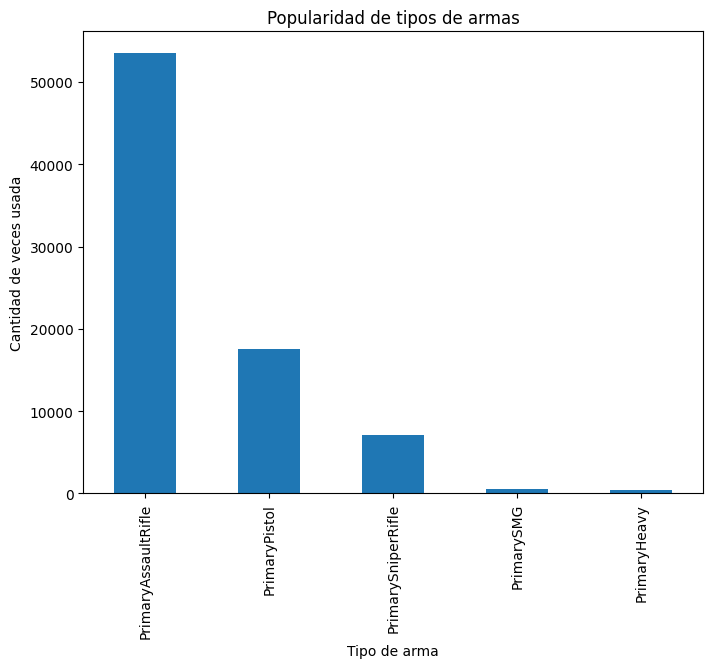

In [ ]:
# Gráfico de barras del uso de armas
import matplotlib.pyplot as plt

uso_armas.sort_values(ascending=False).plot(kind='bar', figsize=(8,6))
plt.title('Popularidad de tipos de armas')
plt.ylabel('Cantidad de veces usada')
plt.xlabel('Tipo de arma')
plt.show()


In [ ]:
# Primero, crear nuevas columnas que indiquen si el jugador usó cada tipo de arma en esa partida
df['UsaAssaultRifle'] = (df['PrimaryAssaultRifle'] > 0).astype(int)
df['UsaSniperRifle'] = (df['PrimarySniperRifle'] > 0).astype(int)
df['UsaHeavy'] = (df['PrimaryHeavy'] > 0).astype(int)
df['UsaSMG'] = (df['PrimarySMG'] > 0).astype(int)
df['UsaPistol'] = (df['PrimaryPistol'] > 0).astype(int)

# Luego, calculamos la tasa de victorias promedio para cada tipo de arma
victorias_por_arma = {
    'AssaultRifle': df[df['UsaAssaultRifle'] == 1]['MatchWinner'].mean(),
    'SniperRifle': df[df['UsaSniperRifle'] == 1]['MatchWinner'].mean(),
    'Heavy': df[df['UsaHeavy'] == 1]['MatchWinner'].mean(),
    'SMG': df[df['UsaSMG'] == 1]['MatchWinner'].mean(),
    'Pistol': df[df['UsaPistol'] == 1]['MatchWinner'].mean(),
}

# Mostrar resultados
for arma, tasa in victorias_por_arma.items():
    print(f"Tasa de victorias usando {arma}: {tasa:.2f}")


Tasa de victorias usando AssaultRifle: 0.43
Tasa de victorias usando SniperRifle: 0.42
Tasa de victorias usando Heavy: 0.51
Tasa de victorias usando SMG: 0.29
Tasa de victorias usando Pistol: 0.60


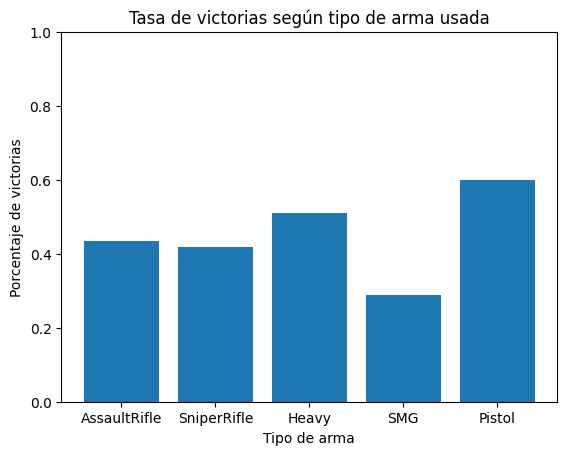

In [ ]:
# Gráfico de tasa de victorias por tipo de arma
plt.bar(victorias_por_arma.keys(), victorias_por_arma.values())
plt.title('Tasa de victorias según tipo de arma usada')
plt.ylabel('Porcentaje de victorias')
plt.xlabel('Tipo de arma')
plt.ylim(0,1)
plt.show()


El análisis muestra que el Rifle de Asalto es el tipo de arma más popular entre los jugadores, y su uso se asocia a una mayor probabilidad de ganar partidas. Esto sugiere que el acceso a rifles de asalto, por su balance entre daño, precisión y movilidad, otorga una ventaja competitiva significativa

# Pregunta de clasificacion

### Probabilidad de ganar según dinero gastado

In [ ]:
# Variable X: dinero gastado
X = df[['RoundStartingEquipmentValue']]

# Variable y: ganó o no la ronda
y = df['RoundWinner']


In [ ]:
# Preparar X (dinero gastado)
X = df[['RoundStartingEquipmentValue']]

# Preparar y (gana ronda sí/no), transformando texto en número
y = (df['RoundWinner'] == 'True').astype(int)

# Crear modelo
modelo = LinearRegression()

# Ajustar modelo
modelo.fit(X, y)



LinearRegression()

In [ ]:
# Mostrar coeficiente (pendiente) y el intercepto
print(f"Coeficiente (β1): {modelo.coef_[0]:.6f}")
print(f"Intercepto (β0): {modelo.intercept_:.6f}")


Coeficiente (β1): -0.000027
Intercepto (β0): 0.309653


In [ ]:
# Predecir probabilidad de ganar gastando $5000
dinero = np.array([[5000]])
probabilidad_ganar = modelo.predict(dinero)

print(f"Probabilidad de ganar gastando $5000: {probabilidad_ganar[0]:.2f}")


Probabilidad de ganar gastando $5000: 0.17


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


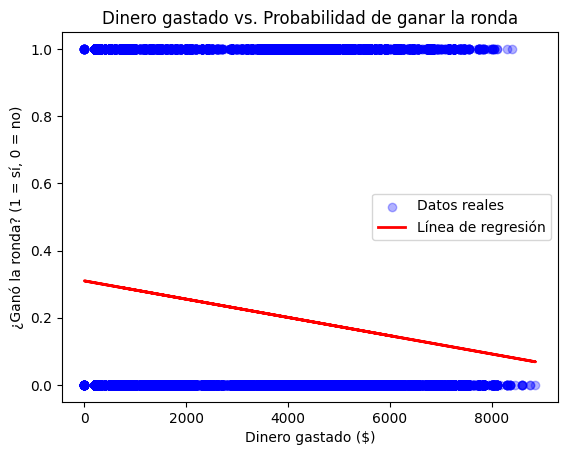

In [ ]:
# Graficar datos y línea de regresión
plt.scatter(X, y, color='blue', alpha=0.3, label='Datos reales')
plt.plot(X, modelo.predict(X), color='red', linewidth=2, label='Línea de regresión')

plt.title('Dinero gastado vs. Probabilidad de ganar la ronda')
plt.xlabel('Dinero gastado ($)')
plt.ylabel('¿Ganó la ronda? (1 = sí, 0 = no)')
plt.legend()
plt.show()


De acuerdo con la regresión lineal aplicada, no se observó una relación positiva entre dinero gastado y probabilidad de ganar una ronda. De hecho, existe una ligera tendencia negativa, indicando que gastar más dinero no necesariamente incrementa las victorias en el juego



## Fase 3: Data Preparation

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.

In [ ]:
# Solo columnas numéricas relevantes para outliers
columnas_outliers = ['RoundStartingEquipmentValue', 'TimeAlive', 'TravelledDistance', 'RoundKills']

# Función para eliminar outliers basada en IQR
def eliminar_outliers(df, columnas):
    for col in columnas:

        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]
        else:
            print(f"Skipping column '{col}' as it is not numeric.")
    return df

# Aplicar función solo en las columnas numéricas relevantes
df = eliminar_outliers(df, columnas_outliers)

# Revisar resultado
print("Outliers eliminados, nuevo tamaño del dataset:", df.shape)

: 

###Manipulación de filas y columnas

In [3]:
#Modificación de equipo por team id
for partida in df['MatchId'].unique():
  team1 = df[(df['RoundId']==1) & (df['InternalTeamId']==1) & (df['MatchId']==partida)]['Team'].unique()[0]
  team2 = df[(df['RoundId']==1) & (df['InternalTeamId']==2) & (df['MatchId']==partida)]['Team'].unique()[0]
  rondas = df[(df['MatchId']==partida)]['RoundId'].unique()
  for ronda in rondas:
    if ronda<16:
      df.loc[(df['RoundId']==ronda) & (df['InternalTeamId']==1) & (df['MatchId']==partida), 'Team'] = team1
      df.loc[(df['RoundId']==ronda) & (df['InternalTeamId']==2) & (df['MatchId']==partida), 'Team'] = team2
    elif ronda>=16:
      df.loc[(df['RoundId']==ronda) & (df['InternalTeamId']==1) & (df['MatchId']==partida), 'Team'] = team2
      df.loc[(df['RoundId']==ronda) & (df['InternalTeamId']==2) & (df['MatchId']==partida), 'Team'] = team1

In [ ]:
#Cambio de datos: Cambiar de False4 en RoundWinner a False, agregar False a MatchWinner, ya que en contexto aplica
df.loc[29,'MatchWinner'] = 'False'
df.loc[29,'RoundWinner'] = 'False'

: 

In [5]:
#Se eliminará columna Unnamed: 0, ya que solo contiene las ID de las filas
#Se eliminará AbnormalMatch, ya que contiene solamente valores False
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['AbnormalMatch'], inplace=True)

In [6]:
#Eliminación de partidas que tengan menos de 16 rondas
for partida in df['MatchId'].unique():
  if df[df['MatchId']==partida]['RoundId'].unique().size<16:
    df.drop(df[df['MatchId']==partida].index, inplace=True)

In [7]:
#Eliminación de filas que corresponda tengan más de 31 rondas
for partida in df[df['RoundId']>31]['MatchId'].unique():
  df.drop(df[df['MatchId']==partida].index, inplace=True)

In [8]:
#Eliminación de partidas que tengan más o menos jugadores en un equipo
for partida in df['MatchId'].unique():
  cant_t1 = df[(df['InternalTeamId']==1) & (df['MatchId']==partida)]['Map'].count()
  cant_t2 = df[(df['InternalTeamId']==2) & (df['MatchId']==partida)]['Map'].count()
  if(cant_t1-cant_t2!=0):
    df.drop(df[df['MatchId']==partida].index, inplace=True)

###Transformación y Preparación de Datos

In [9]:
#Dada la naturaleza de los datos, y dado que en cada columna hay datos str y bool,
#se cambiará ambas filas (match y round winner) a str

df['MatchWinner'] = df['MatchWinner'].astype(str)
df['RoundWinner'] = df['RoundWinner'].astype(str)

In [10]:
#Obtención de un valor visible para las columnas de armas
armas = ['PrimaryAssaultRifle', 'PrimarySniperRifle','PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol']
for tipo_arma in armas:
  df[tipo_arma] = (df[tipo_arma] * df['RoundStartingEquipmentValue']).astype(int)


In [11]:
#Transformación de filas booleanas a 0 y 1
df['MatchWinner'] = (df['MatchWinner']=="True").astype(int)
df['RoundWinner'] = (df['RoundWinner']=="True").astype(int)
df['Survived'] = (df['Survived']==True).astype(int)

In [12]:
#Verificar si existen partidas en donde no se introdujo un ganador
no_winners = []
for partida in df['MatchId'].unique():
  if df[(df['MatchId']==partida) & (df['RoundId']==1) & (df['MatchWinner']==1)]['Map'].count() != 5:
    no_winners.append(partida)

print(no_winners)

[np.int64(115), np.int64(139), np.int64(180), np.int64(207), np.int64(212), np.int64(213), np.int64(229), np.int64(237), np.int64(278), np.int64(297), np.int64(314), np.int64(319), np.int64(338), np.int64(342), np.int64(482), np.int64(510)]


In [13]:
#Creación de algoritmo, para revisar las partidas, ver qué equipo tuvo más rondas
#ganadas, y de ello sacar el ganador
for partida in no_winners:
  ganadas_t1 = df[(df['RoundWinner']==1) & (df['MatchId']==partida) & (df['InternalTeamId']==1)]['Map'].count()
  ganadas_t2 = df[(df['RoundWinner']==1) & (df['MatchId']==partida) & (df['InternalTeamId']==2)]['Map'].count()
  if ganadas_t1>ganadas_t2:
    print(f"Partida {partida} ganó equipo 1")
    df.loc[(df['InternalTeamId']==1) & (df['MatchId']==partida),'MatchWinner'] = 1
  else:
    print(f"Partida {partida} ganó equipo 2")
    df.loc[(df['InternalTeamId']==2) & (df['MatchId']==partida),'MatchWinner'] = 1

Partida 115 ganó equipo 2
Partida 139 ganó equipo 2
Partida 180 ganó equipo 2
Partida 207 ganó equipo 2
Partida 212 ganó equipo 2
Partida 213 ganó equipo 2
Partida 229 ganó equipo 1
Partida 237 ganó equipo 1
Partida 278 ganó equipo 1
Partida 297 ganó equipo 2
Partida 314 ganó equipo 2
Partida 319 ganó equipo 2
Partida 338 ganó equipo 2
Partida 342 ganó equipo 1
Partida 482 ganó equipo 2
Partida 510 ganó equipo 2


In [14]:
#Consideración de algunas columnas para trabajar sobre ellas,
#además de cambio de nombre para mejor identificación

columnas = ['Mapa','Equipo','NumInterno','NumPartida','NumRonda','KillsRonda','DineroIndividual','ValorAR', 'ValorSR','ValorPesado', 'ValorSMG', 'ValorPistola','DineroEquipo','GranadasLetales','GranadasNoLetales','Sobrevive','GanaRonda','GanaPartida']
datos_considerar = df[['Map','Team','InternalTeamId','MatchId','RoundId','RoundKills','RoundStartingEquipmentValue','PrimaryAssaultRifle', 'PrimarySniperRifle','PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol','TeamStartingEquipmentValue','RLethalGrenadesThrown','RNonLethalGrenadesThrown','Survived','RoundWinner','MatchWinner']].copy()
datos_considerar.rename(columns=dict(zip(datos_considerar.columns, columnas)), inplace=True)

In [15]:
#Valores a cambiar de mapa
datos_considerar['Mapa'].unique()

array(['de_inferno', 'de_mirage', 'de_dust2', 'de_nuke'], dtype=object)

In [16]:
#Reemplazo de Mapa y Equipo por valores numéricos
datos_considerar.Mapa.replace({"de_inferno":1, "de_nuke":2, "de_mirage":3, "de_dust2":4}, inplace=True)
datos_considerar.Equipo.replace({"Terrorist":1, "CounterTerrorist":2}, inplace=True)

<ipython-input-16-e00e9299ebf0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_considerar.Mapa.replace({"de_inferno":1, "de_nuke":2, "de_mirage":3, "de_dust2":4}, inplace=True)
<ipython-input-16-e00e9299ebf0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_considerar.Mapa.replace({"de

In [17]:
datos = pd.DataFrame()

In [18]:
datos['NumPartida'],datos['NumRonda'],datos['Mapa'],datos['NumInterno'],datos['Equipo'],datos['Granadas'] = datos_considerar['NumPartida'], datos_considerar['NumRonda'], datos_considerar['Mapa'], datos_considerar['NumInterno'], datos_considerar['Equipo'], (datos_considerar['GranadasNoLetales']+datos_considerar['GranadasLetales'])

In [19]:
datos['GanaRonda'] = datos_considerar['GanaRonda']